In [2]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import pandas as pd

# Introduction to Python for Data Analysis
## College of Forestry, Oregon State University
### April 2018

## Acknowledgements
* Funding for this workshop is provided by the Research Support Faculty (RSF) Professional Development Fund
* Huge thanks to Jerry Mohr for dealing with registration details and ensuring lab computers were set up
* Thanks to Ty Nieptuski and Bryce Frank who have volunteered to help out when I've given you poor instructions

## Format of this workshop
### Monday
* Data ingestion and wrangling using pandas
* Communication with R
* Data analysis packages in Python

## Format of this workshop (cont.)
### Wednesday
* Raster analysis and modeling
* Introduction to graphing/charting packages
* Tips and tricks for Python and Jupyter

## Format of this workshop (cont.)
### With each module:
* I'll introduce the topics and packages which which we'll be working
* Give some examples of the packages' functionality
* Have you work through sample analyses (hopefully majority of time)

## Caveats!
* This will be raw and unpolished!  First time workshop
* This is geared toward the *beginning* Python user.  It's possible that you'll speed through the exercises - if so, please help those around you.
* This is a wide and shallow look at Python (as opposed to narrow and deep).  Whiplash is possible!
* Feedback is encouraged

## Terminology and aliases
I will likely throw out a bunch of terms that are unfamiliar and I apologize upfront.  But here are a few terms that weren't explicit in the training materials that we'll use in these workshops:

* Module - a set of Python functions, variables, classes, etc. typically stored in one file (e.g. `math`)
* Package - a collection of one or more related modules distributed as an installable unit (e.g. `pandas`)
* Function vs. method - method is a function within a Python class
* When importing, it's common to "alias" certain packages to shorter names with the `as` keyword

  * `import pandas as pd`

Please stop me when I say something that is unfamiliar.  It's likely that others have the same question.

## And now for something completely different ...
This is the required silliness to get out of the way with every Python workshop
* Python isn't named for the snake ...

![](./cheese_shop.jpg "Monty Python")

# Module 1: Data ingestion and wrangling using pandas

## Pandas
### What problem does pandas solve?
From website:

Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

Combined with the excellent IPython toolkit and other libraries, the environment for doing data analysis in Python excels in performance, productivity, and the ability to collaborate.

pandas does not implement significant modeling functionality outside of linear and panel regression; for this, look to statsmodels and scikit-learn. More work is still needed to make Python a first class statistical modeling environment, but we are well on our way toward that goal.

## Pandas (cont.)
* One of the most important packages in Python data analysis (up there with numpy)
* Heavy overlap with R functionality, especially data frames
* Pivotal package for data munging and exploration
* Of all packages presented, I want you to understand pandas

### Main pandas data types (classes)
* Series is a 1-dimensional labeled array (think either dict or list)
* DataFrame is a 2-dimensional labeled data structure of potentially different data types (think spreadsheet)
* Panel is a 3-dimensional labeled data structure (although used somewhat infrequently - now being deprecated)

### Constructing Series from scratch

In [4]:
# Importing pandas
import pandas as pd

# Construction of series from numpy array and index labels
pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

a    1.443038
b   -0.900734
c    0.933804
d   -1.114082
e   -0.158364
dtype: float64

In [6]:
# Construction of series from just numpy array (no labels)
pd.Series(np.random.randn(5))

0   -0.805869
1   -0.540160
2   -0.045738
3    0.100343
4   -2.199039
dtype: float64

In [7]:
# Construction of series from dictionary
d = {'name': 'Homer', 'age': 45, 'weight': 210}
pd.Series(d)

age          45
name      Homer
weight      210
dtype: object

### Indexing Series

In [15]:
# Indexing by number; keys get ordered alphabetically
s = pd.Series({'name': 'Homer', 'age': 45, 'weight': 210})

In [9]:
print(s[0])

45


In [10]:
print(s[1:])

name      Homer
weight      210
dtype: object


In [11]:
print(s[[1, 2, 0]])

name      Homer
weight      210
age          45
dtype: object


In [12]:
# Indexing by label
print(s['name'])

Homer


In [13]:
# Setting values by label
s['age'] = 12
print(s)

age          12
name      Homer
weight      210
dtype: object


In [14]:
# Expression evaluation - returns boolean values
print(s['age'] < 30)
print(s['name'] == 'Marge')

True
False


### Constructing DataFrames from scratch

In [16]:
# Construction of DataFrame from pandas Series objects
d = {
    'one' : pd.Series([1., 2., 3., 4.]),
    'two' : pd.Series([5., 6., 7., 8.])
}
print(pd.DataFrame(d))

   one  two
0  1.0  5.0
1  2.0  6.0
2  3.0  7.0
3  4.0  8.0


In [17]:
# Construction of DataFrame from pandas Series objects with indexes
# Notice the NaN
d = {
    'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'd']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}
print(pd.DataFrame(d))

   one  two
a  1.0  1.0
b  2.0  2.0
c  NaN  3.0
d  3.0  4.0


### Constructing DataFrames from scratch (cont.)

In [20]:
# Construction of DataFrame from list of dictionaries
d = [
    {'first_name': 'Homer', 'age': 45, 'height': 65},
    {'first_name': 'Marge', 'age': 42, 'height': 68},
    {'first_name': 'Bart', 'age': 11, 'height': 49},
    {'first_name': 'Lisa', 'age': 9, 'height': 47},
    {'first_name': 'Maggie', 'age': 2, 'height': 24}
]
print(pd.DataFrame(d))

   age first_name  height
0   45      Homer      65
1   42      Marge      68
2   11       Bart      49
3    9       Lisa      47
4    2     Maggie      24


In [19]:
# Construction of DataFrame from list of lists (or tuples) with list of column names
# Notice the ordering of columns
lol = [
    ['Homer', 45, 65],
    ['Marge', 42, 68],
    ['Bart', 11, 49],
    ['Lisa', 9, 47],
    ['Maggie', 2, 24]
]
print(pd.DataFrame(lol, columns=['first_name', 'age', 'height']))

  first_name  age  height
0      Homer   45      65
1      Marge   42      68
2       Bart   11      49
3       Lisa    9      47
4     Maggie    2      24


### Indexing DataFrames

In [16]:
# Index by columns
d = [
    {'first_name': 'Homer', 'age': 45, 'height': 65},
    {'first_name': 'Marge', 'age': 42, 'height': 68},
    {'first_name': 'Bart', 'age': 11, 'height': 49},
    {'first_name': 'Lisa', 'age': 9, 'height': 47},
    {'first_name': 'Maggie', 'age': 2, 'height': 24}
]
df = pd.DataFrame(d)
df.set_index('first_name', inplace=True)

In [17]:
# One column
print(df['age'])

first_name
Homer     45
Marge     42
Bart      11
Lisa       9
Maggie     2
Name: age, dtype: int64


In [18]:
# Two columns, not necessarily in order
print(df[['height', 'age']])

            height  age
first_name             
Homer           65   45
Marge           68   42
Bart            49   11
Lisa            47    9
Maggie          24    2


In [22]:
# Index by rows (integers)
print(df.iloc[0:2])

            age  height
first_name             
Homer        45      65
Marge        42      68


In [20]:
# Index by rows (labels)
print(df.loc[['Homer', 'Bart']])

            age  height
first_name             
Homer        45      65
Bart         11      49


In [24]:
# Index by both rows and columns (integers)
print(df.iloc[0:2, 1])
print('-' * 50)
print(df.iloc[1, :])

first_name
Homer    65
Marge    68
Name: height, dtype: int64
--------------------------------------------------
age       42
height    68
Name: Marge, dtype: int64


In [22]:
# Index by both rows and columns (labels)
print(df.loc[['Lisa', 'Maggie'],['age']])

            age
first_name     
Lisa          9
Maggie        2


In [25]:
# Index by expression
print(df[df['age'] < 30])

            age  height
first_name             
Bart         11      49
Lisa          9      47
Maggie        2      24


In [24]:
# Compound expressions
print(df.loc[(df['height'] > 30) & (df['age'] < 30)])

            age  height
first_name             
Bart         11      49
Lisa          9      47


### Importing from other sources
A vast majority of the time, you will be bringing data in from other sources and not creating from scratch.  Pandas can go from a variety of formats: CSV, tab- or space-delimited, Excel, HDF5, JSON, SQL, SAS etc.

In [26]:
# Reading from a CSV file
# .head() shows top n rows - by default, this is 5
iris_df = pd.read_csv('iris.csv')
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [27]:
# Using an index with CSV files
tree_df = pd.read_csv('tree.csv', index_col='LIVE_ID')
print(tree_df.head())

          PLTID SPP_SYMBOL         SCIENTIFIC_NAME  CON  DBH_CM     HT_M  \
LIVE_ID                                                                    
3081763  153476      ABGRC  Abies grandis/concolor    1  28.702  29.2608   
3081764  153476      ABGRC  Abies grandis/concolor    1  40.640  29.8704   
3081765  153476      ABGRC  Abies grandis/concolor    1  47.498  30.4800   
3081766  153476       PSME   Pseudotsuga menziesii    1  43.180  32.6136   
3081767  153476       PSME   Pseudotsuga menziesii    1   3.048   3.0480   

          BA_M2   TPH_PLT  
LIVE_ID                    
3081763  0.0647   14.8708  
3081764  0.1297   14.8708  
3081765  0.1772   14.8708  
3081766  0.1464   14.8708  
3081767  0.0007  185.2421  


In [28]:
# Only bringing in certain columns
iris_df = pd.read_csv('iris.csv', usecols=('sepal_length', 'sepal_width', 'species'))
print(iris_df.head())

   sepal_length  sepal_width species
0           5.1          3.5  setosa
1           4.9          3.0  setosa
2           4.7          3.2  setosa
3           4.6          3.1  setosa
4           5.0          3.6  setosa


In [29]:
# Example of reading in an Excel file (requires xlrd package)
plot_df = pd.read_excel('plot_data.xlsx')
print(plot_df.head())

    PLTID  CNTY  NAT_FOREST_GIS
0  153476    27             606
1  153581     5             606
2  153583     5             606
3  153690    65             606
4  153714    65             606


### Exporting data
Pandas supports almost the same list of output writers (excluding SAS)

In [32]:
# Output of data frame to CSV file
# Unless your index is meaningful, it is generatlly left out (index=False)
iris_df.to_csv('iris_copy.csv', index=False)

In [31]:
# Very simple way to subset columns in a CSV file and re-export
df = pd.read_csv('plot_spatial.csv', usecols=['PLTID', 'ANNPRE', 'DEM'])
df.to_csv('plot_spatial_subset.csv', index=False)

### Modifying existing DataFrames
#### Creating new columns
Columns in existing dataframes can be created using the `df[var_name] = ` syntax

In [33]:
# Read in the iris dataset
iris_df = pd.read_csv('iris.csv')

# New column equal to sepal_length * sepal_width
iris_df['sepal_area'] = iris_df['sepal_length'] * iris_df['sepal_width']

# Display
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width species  sepal_area
0           5.1          3.5           1.4          0.2  setosa       17.85
1           4.9          3.0           1.4          0.2  setosa       14.70
2           4.7          3.2           1.3          0.2  setosa       15.04
3           4.6          3.1           1.5          0.2  setosa       14.26
4           5.0          3.6           1.4          0.2  setosa       18.00


Columns on right side of equation can also be referenced using the 'dot' syntax.  Left side always has to be dictionary syntax.

In [34]:
# New column equal to sepal_length * sepal_width
iris_df['sepal_area'] = iris_df.sepal_length * iris_df.sepal_width

# Display
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width species  sepal_area
0           5.1          3.5           1.4          0.2  setosa       17.85
1           4.9          3.0           1.4          0.2  setosa       14.70
2           4.7          3.2           1.3          0.2  setosa       15.04
3           4.6          3.1           1.5          0.2  setosa       14.26
4           5.0          3.6           1.4          0.2  setosa       18.00


### Modifying existing DataFrames (cont.)
#### Creating new rows - two main approaches

Using `pd.concat` to stitch together many DataFrames

In [35]:
# Sample data frame
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=('A', 'B'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=('A', 'B'))
df_all = pd.concat([df1, df2], ignore_index=True)
print(df_all.head())

   A  B
0  1  2
1  3  4
2  5  6
3  7  8


Stitching one or more rows onto an existing DataFrame using `df.append`.  The use of `ignore_index=True` guarantees that indexes will be unique.

In [36]:
new_row = {'A': 3, 'B': 10}
print(df_all.append(new_row, ignore_index=True))

   A   B
0  1   2
1  3   4
2  5   6
3  7   8
4  3  10


In [37]:
two_rows = [{'A': 100, 'B': 200}, {'A': 12, 'B': 24}]
print(df_all.append(two_rows, ignore_index=True))

     A    B
0    1    2
1    3    4
2    5    6
3    7    8
4  100  200
5   12   24


### Modifying existing DataFrames (cont.)
#### Dropping rows and columns

In [38]:
# In-place drop of columns
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=('A', 'B'))
df1.drop(columns=['A'], inplace=True)
print(df1)

   B
0  2
1  4


In [39]:
# In-place drop of rows
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=('A', 'B'))
df1.drop(index=[0], inplace=True)
print(df1)

   A  B
1  3  4


In [40]:
# Non-modifying drop of rows and columns   
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=('A', 'B'))
df2 = df1.drop(index=[0], columns=['A'])
print(df2)
print(df1)

   B
1  4
   A  B
0  1  2
1  3  4


### Merging DataFrames
Pandas provides a mechanism for SQL-like joins to "stitch together" DataFrames based on common keys between them.  Joins can be one-to-one, many-to-one or many-to-many.

In [41]:
left = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})

right = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
})

# Simple one-to-one join on column 'key'
print(pd.merge(left, right, on='key'))

    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K2  C2  D2
3  A3  B3  K3  C3  D3


The default join is an "inner" join where records common to each are retained.  But left, right, and outer joins are also possible.  On left, right, and outer joins, records that are not present receive 'NA' values.

In [42]:
# Inner join (only 'K0' common to both)
left = pd.DataFrame({
    'key': ['K0', 'K1'],
    'A': ['A0', 'A1'],
    'B': ['B0', 'B1']
})

right = pd.DataFrame({
    'key': ['K0', 'K2'],
    'C': ['C0', 'C2'],
    'D': ['D0', 'D2']
})
print(pd.merge(left, right, on='key'))

    A   B key   C   D
0  A0  B0  K0  C0  D0


In [43]:
# Left join - all records from left
print(pd.merge(left, right, on='key', how='left'))

    A   B key    C    D
0  A0  B0  K0   C0   D0
1  A1  B1  K1  NaN  NaN


In [44]:
# Right join - all records from right
print(pd.merge(left, right, on='key', how='right'))

     A    B key   C   D
0   A0   B0  K0  C0  D0
1  NaN  NaN  K2  C2  D2


In [45]:
# Outer join - all records from both
print(pd.merge(left, right, on='key', how='outer'))

     A    B key    C    D
0   A0   B0  K0   C0   D0
1   A1   B1  K1  NaN  NaN
2  NaN  NaN  K2   C2   D2


### Merging DataFrames (cont.)
It's also possible to create one-to-many joins between DataFrames.

In [46]:
parent_df = pd.DataFrame([
    {'first_name': 'Homer', 'age': 45, 'height': 65}
])
children_df = pd.DataFrame([
    {'first_name': 'Bart', 'parent_name': 'Homer', 'age': 11, 'height': 49},
    {'first_name': 'Lisa', 'parent_name': 'Homer', 'age': 9, 'height': 47},
    {'first_name': 'Maggie', 'parent_name': 'Homer', 'age': 2, 'height': 24}
])
all_df = pd.merge(children_df, parent_df, left_on='parent_name', right_on='first_name', suffixes=['_child', '_parent'])
print(all_df)

   age_child first_name_child  height_child parent_name  age_parent  \
0         11             Bart            49       Homer          45   
1          9             Lisa            47       Homer          45   
2          2           Maggie            24       Homer          45   

  first_name_parent  height_parent  
0             Homer             65  
1             Homer             65  
2             Homer             65  


### Grouping and aggregating data
This functionality is very similar to SQL GROUP-BY queries

In [48]:
# Read in the iris dataset
iris_df = pd.read_csv('iris.csv')

# Use a column within the dataset to group records - we will use 'species'
# This is very similar to an SQL group-by statement.  All records with the
# same species get grouped together into new DataFrames
group_df = iris_df.groupby('species')

# Iterate over groups and get list of records
for name, group in group_df:
    print(name)
    print(group)

setosa
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8  

In [49]:
# Get the sizes of the groups
print(group_df.size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [50]:
# Get statistical information about all columns in the group
# This returns eight variables per column in the input
print(group_df.describe())

           petal_length                                               \
                  count   mean       std  min  25%   50%    75%  max   
species                                                                
setosa             50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal_width        ...  sepal_length      sepal_width         \
                 count   mean ...           75%  max       count   mean   
species                       ...                                         
setosa            50.0  0.244 ...           5.2  5.8        50.0  3.418   
versicolor        50.0  1.326 ...           6.3  7.0        50.0  2.770   
virginica         50.0  2.026 ...           6.9  7.9        50.0  2.974   

                                                   
                 std  min    25%  50%    75%  max  
species     

### Grouping and aggregating data (cont.)

In [51]:
# Specifying a separate aggregation function for each column
# We can rename the columns during evaluation as well
print(group_df
         .agg({'petal_length': max, 'petal_width': min})
         .rename(columns={
             # Original names to new names
             'petal_width': 'min_petal_width',
             'petal_length': 'max_petal_length'
         })
)

            min_petal_width  max_petal_length
species                                      
setosa                  0.1               1.9
versicolor              1.0               5.1
virginica               1.4               6.9


In [52]:
# An example of taking the nth row from each group

# First row from each group
print(group_df.nth(0))

# Last row from each group
print(group_df.nth(-1))

            petal_length  petal_width  sepal_length  sepal_width
species                                                         
setosa               1.4          0.2           5.1          3.5
versicolor           4.7          1.4           7.0          3.2
virginica            6.0          2.5           6.3          3.3
            petal_length  petal_width  sepal_length  sepal_width
species                                                         
setosa               1.4          0.2           5.0          3.3
versicolor           4.1          1.3           5.7          2.8
virginica            5.1          1.8           5.9          3.0


### Grouping and aggregating data (cont.)

In [53]:
# It's also possible to group over more than one variable
# Doing so creates a multi-index
iris_df = pd.read_csv('iris.csv')

# Using both 'species' and 'petal_length' as grouping fields
group_df = iris_df.groupby(['species', 'petal_length'])
print(group_df.mean().head())
print('-' * 50)
print(group_df.std().head())

                      sepal_length  sepal_width  petal_width
species petal_length                                        
setosa  1.0               4.600000     3.600000     0.200000
        1.1               4.300000     3.000000     0.100000
        1.2               5.400000     3.600000     0.200000
        1.3               4.842857     3.228571     0.257143
        1.4               4.916667     3.333333     0.216667
--------------------------------------------------
                      sepal_length  sepal_width  petal_width
species petal_length                                        
setosa  1.0                    NaN          NaN          NaN
        1.1                    NaN          NaN          NaN
        1.2               0.565685     0.565685     0.000000
        1.3               0.464963     0.502375     0.078680
        1.4               0.301008     0.360135     0.057735


### Simple plotting functions for pandas data

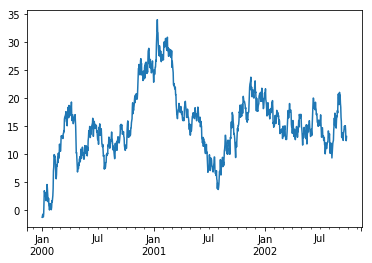

In [54]:
# Time series data of 1000 normally distributed random numbers,
# for 1000 days after 1/1/2000
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

# Cumulative sum of this data
ts = ts.cumsum()

# Simple line plot
ts.plot();

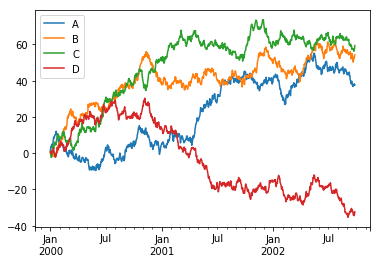

In [55]:
# Same thing for for four different series
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot();

### Simple plotting functions for pandas data (cont.)

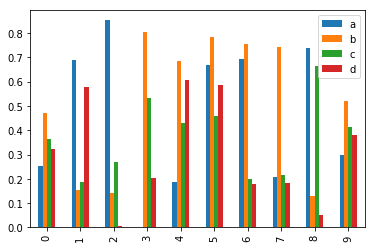

In [56]:
# 10 rows by 4 columns random (0-1) 
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

# Simple bar chart
df.plot.bar();

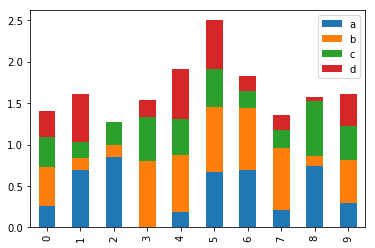

In [57]:
# Same thing but with a stacked bar chart
df.plot.bar(stacked=True);

Dozens more examples on pandas website (http://pandas.pydata.org/pandas-docs/stable/visualization.html)

## Exercises

### Exercise 1: Summarizing tree data and linking to environmental data

The goal for this exercise is to first summarize forest plot inventory data at the 'piece' level up to the 'stand' level and then examine its relationship with environmental variables extracted from (fuzzed) plot locations.  The tree data comes from Forest Inventory and Analysis plots.  We will perform the following tasks:

* Read in tree level data from an SQLite database
* Create a new variable to represent basal area per hectare at the tree level
* Calculate stand level mean DBH (basal-area weighted)
* Calculate binned classes of mean DBH
* Read in environmental data from plot locations
* Visualize relationships between mean DBH and spatial variables
* Visualize relationships between spatial variables with DBH classes
* Export all modeling data

We need to import a few packages for this analysis.  Go ahead and just evaluate the following cell:

In [390]:
%matplotlib inline

# Required import statements
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns

There is an SQLite database in this same directory called `tree_data.db`.  In order to read this data into pandas, you will need to first connect to the database.  You will then provide an SQL statement to direct what data to get and finally read these data into pandas using the `pd.read_sql` command.  

To read data from SQLite, you need to use the `sqlite3` package.  The method you will use is called `connect` and it takes a filename as its only argument.  Run the following cell:

In [439]:
# Read in tree data from an SQLite database
conn = sqlite3.connect("tree_data.db")

Now, we need an SQL statement to tell us what data to grab.  SQLite databases have tables stored in them which are accessible by table name.  In our case we want to grab all the data from the table called `tree_data`.  Run the following cell:

In [440]:
# Set up the SQL statement
sql = 'SELECT * FROM tree_data'

Finally, we want to use the `pd.read_sql` function to read the data from SQLite into a pandas DataFrame.  Search for help on `pd.read_sql` and see if you can read the data into a new DataFrame called `tree_df`.  You also want to print the number of records in the dataframe with the `len` function and look at the top 10 records of this DataFrame using the `head` function.  Try all of this in the following cell and copy the solution if you get stuck:

In [441]:
tree_df = pd.read_sql(sql, conn)
print("Number of records: ", len(tree_df))
print(tree_df.head(10))

Number of records:  9796
   index  LIVE_ID   PLTID SPP_SYMBOL         SCIENTIFIC_NAME  CON  DBH_CM  \
0      0  3081763  153476      ABGRC  Abies grandis/concolor    1  28.702   
1      1  3081764  153476      ABGRC  Abies grandis/concolor    1  40.640   
2      2  3081765  153476      ABGRC  Abies grandis/concolor    1  47.498   
3      3  3081766  153476       PSME   Pseudotsuga menziesii    1  43.180   
4      4  3081767  153476       PSME   Pseudotsuga menziesii    1   3.048   
5      5  3081768  153476      ABGRC  Abies grandis/concolor    1  32.512   
6      6  3081633  153581       TSHE      Tsuga heterophylla    1  18.542   
7      7  3081634  153581       TSHE      Tsuga heterophylla    1   5.842   
8      8  3081635  153581       TSHE      Tsuga heterophylla    1   3.810   
9      9  3081636  153581       TSHE      Tsuga heterophylla    1   4.572   

      HT_M   BA_M2   TPH_PLT  
0  29.2608  0.0647   14.8708  
1  29.8704  0.1297   14.8708  
2  30.4800  0.1772   14.8708  
3  

Now we have a DataFrame with the piece-level data.  We first need to create a field call `BAPH_PLT` that represents the tree record's basal area expanded out to a per hectare basis.  We already have the fields called `BA_M2` (tree basal area) and `TPH_PLT` (trees per hectare), so we need to multiply these two fields together to create `BAPH_PLT`.  Evaluate the following cell:

In [410]:
# Create field of BAPH_PLT (Basal area per hectare at the plot level)
tree_df['BAPH_PLT'] = tree_df.BA_M2 * tree_df.TPH_PLT

We have what we need in the piece-level table and now we want to summarize these data at the "stand" level.  The field called `PLTID` signifies the stand ID so we'll want to group on this variable.  Based on what you learned about setting up grouped data, create a new DataFrame called `tree_group_df` that groups the tree data by `PLTID` in the cell below.  At this point we are only *grouping* the data and not *summarizing* it.

In [411]:
# Group by PLTID
tree_group_df = tree_df.groupby('PLTID')

We need to create a custom function that can calculate a mean tree diameter for each stand that is weighted by the `BAPH_PLT` field we calculated previously.  The equation for this is `sum(DBH_CM * BAPH_PLT) / sum(BAPH_PLT)`.  We provide this function below (`weighted_mean`).  Go ahead and evaluate this cell.

In [398]:
# Create a function that calculates basal-area weighted 
# mean diameter.  The argument df is a DataFrame containing
# a single groups' records.
def weighted_mean(df):
    return np.sum(df.DBH_CM * df.BAPH_PLT) / np.sum(df.BAPH_PLT)

We will use this custom function along with our grouped DataFrame (`tree_group_df`) to calculate stand mean diameter.  Search for help on `tree_group_df.apply` in the cell below.  Then do the following:

* Using the `apply` method of `tree_group_df`, calculate a series called `stand_s` (calculated mean diameter)
* Give this series (`stand_s`) a name called 'MEAN_WT_DBH' using the `name` attribute on the next line

**Hint**: the `func` argument in `apply` should be the name of the custom function we created.  There will be no other arguments to the `apply` function.

In [412]:
# Use the weighted_mean function to aggregate the output of the group
# using the apply method for tree_group_df
# Then change the name of the series
stand_s = tree_group_df.apply(weighted_mean)
stand_s.name = 'MEAN_WT_DBH'

We need to change this series back into a DataFrame and use a bit of fancy syntax to get there.  Evaluate the following cell.

In [413]:
# Change the Series back to a DataFrame
stand_df = stand_s.to_frame().reset_index()

We're nearly done with the `stand_df` DataFrame.  Our last task is to bin the values in `MEAN_WT_DBH` into classes and store this in a new column called `DBH_CLASS`.  We use the numpy method called `digitize` to bin the data.  In the cell below, the bins for the data are provided.  Search for help on `np.digitize` to figure out what arguments it takes.  You'll want to store the output of this call in a new column of `stand_df` called `DBH_CLASS`.

**Hint**: The 'array-like' object that you want to pass is the series `stand_df.MEAN_WT_DBH`.  

In [ ]:
bins = [0, 10, 30, 60, 100]

In [414]:
# Create a categorical variable of MEAN_WT_DBH
bins = [0, 10, 30, 60, 100]
stand_df['DBH_CLASS'] = np.digitize(stand_df.MEAN_WT_DBH, bins)

Finally, print out the number of records in `stand_df` and print the top five records (the default to `head`)

In [415]:
print("Number of records: ", len(stand_df))
stand_df.head()

Number of records:  290


,PLTID,MEAN_WT_DBH,DBH_CLASS
0,153476,40.332135,3
1,153581,55.785072,3
2,153583,64.583678,4
3,153690,43.910000,3
4,153714,27.150262,2


At this point, we have summarized the tree-level data into a stand-level DataFrame with two variables: `MEAN_WT_DBH` and `DBH_CLASS`.  We will now bring in spatial information about these plot locations.  First, import the CSV file called `plot_spatial.csv` from this directory using the `pd.read_csv` method that you saw in the overview.  Call the output DataFrame `spatial_df`.  Additionally, print the number of records and the `head` of this DataFrame.

In [416]:
# Read in spatial data from a CSV file
csv_fn = 'plot_spatial.csv'
spatial_df = pd.read_csv(csv_fn)
print("Number of records: ", len(spatial_df))
spatial_df.head()

Number of records:  299


,PLTID,ANNPRE,ANNTMP,AUGMAXT,DECMINT,SMRTP,LAT,LON,ASPTR,DEM,PRR,SLPPCT,TPI150,TPI300,TPI450,TC1,TC2,TC3,NBR
0,153476,703,894,2616,-333,322,4563,-12162,131,591,9843,18,11,0,18,2172,1431,-1036,538
1,153581,787,868,2305,-133,226,4540,-12205,1,636,16441,19,-1,-6,0,1604,1360,-211,771
2,153583,736,1125,2653,125,292,4540,-12226,172,197,10872,28,-2,-3,-9,2359,2003,-524,736
3,153690,609,894,2814,-363,365,4527,-12136,38,691,18116,13,0,5,5,2658,976,-1461,259
4,153714,661,772,2644,-432,299,4515,-12150,139,829,16264,60,0,5,-16,1733,1222,-633,557


Use the `merge` method (from the overview) to join together the `stand_df` and `spatial_df` DataFrames.  The joining item is called `PLTID`.  Call the output DataFrame `all_df` and print the number of records in it.

In [418]:
# Merge stand_df and spatial_df together
all_df = stand_df.merge(spatial_df, on='PLTID')
print("Number of records: ", len(all_df))

Number of records:  290


It may have been hard to see, but we have fewer records in `stand_df` than we do in `spatial_df`.  This isn't because we somehow forgot to include these tree records, but rather that these plots have no trees measured on them.  We need to do a LEFT merge using the DataFrame with more records (`spatial_df`) as the left table.  This syntax is seen below.  Go ahead and evaluate this cell. 

In [550]:
# Missing records on merge - instead do left join
all_df = spatial_df.merge(stand_df, how='left', on='PLTID')
print(len(all_df))
all_df.head(25)

299


,PLTID,ANNPRE,ANNTMP,AUGMAXT,DECMINT,SMRTP,LAT,LON,ASPTR,DEM,...,SLPPCT,TPI150,TPI300,TPI450,TC1,TC2,TC3,NBR,MEAN_WT_DBH,DBH_CLASS
0,153476,703,894,2616,-333,322,4563,-12162,131,591,...,18,11,0,18,2172,1431,-1036,538,40.332135,3.0
1,153581,787,868,2305,-133,226,4540,-12205,1,636,...,19,-1,-6,0,1604,1360,-211,771,55.785072,3.0
2,153583,736,1125,2653,125,292,4540,-12226,172,197,...,28,-2,-3,-9,2359,2003,-524,736,64.583678,4.0
3,153690,609,894,2814,-363,365,4527,-12136,38,691,...,13,0,5,5,2658,976,-1461,259,43.910000,3.0
4,153714,661,772,2644,-432,299,4515,-12150,139,829,...,60,0,5,-16,1733,1222,-633,557,27.150262,2.0
5,153716,620,807,2781,-463,333,4501,-12149,13,764,...,31,-5,-11,-15,2105,937,-1243,320,48.412984,3.0
6,153734,750,772,2465,-267,244,4491,-12198,200,1034,...,34,-7,-15,-19,2216,1647,-387,672,23.484662,2.0
7,153737,742,688,2346,-369,233,4511,-12185,76,1125,...,2,1,5,12,2363,1099,-1255,354,66.456546,4.0
8,153743,790,885,2383,-100,234,4555,-12212,25,657,...,2,9,9,4,2009,1709,-206,795,49.614463,3.0
9,153745,800,793,2322,-208,219,4545,-12191,145,878,...,17,0,3,0,1712,1650,-157,801,86.975244,4.0


Take a look at the last record in the DataFrame above and scroll all the way over to the right.  You'll see that where we didn't have data in the `stand_df` table, we now have `NaN` values for `MEAN_WT_DBH` and `DBH_CLASS`.  It's reasonable in this context to set `MEAN_WT_DBH` to 0.0 and `DBH_CLASS` to 1 as these are stands with no trees.  

Look up help for `all_df.fillna`.  We want to first create a dictionary of fill values with these key/value pairs:
* 'MEAN_WT_DBH': 0.0
* 'DBH_CLASS: 1

Then pass this dictionary to the `value` keyword in the `fillna` function to fill multiple columns at once.  Reassign the output to `all_df` (rewriting the current `all_df`. 

In [387]:
# Fill in NaNs for MEAN_WT_DBH (= 0.0) and DBH_CLASS (= 1)
fill_values = {'MEAN_WT_DBH': 0.0, 'DBH_CLASS': 1}
all_df = all_df.fillna(value=fill_values)

Now we have a DataFrame that has both vegetation data and environmental data that can be used in many different modeling contexts.  (Unfortunately, because the spatial variables are extracted from "fuzzed" coordinates, this dataset is not terribly reliable for modeling, so we won't use it in further lessons).  But we can do some visualizations of how the `MEAN_WT_DBH` and `DBH_CLASS` variables relate to environmental variables.  I've provided the code below for a few visualizations, but try to play around with the arguments to create new visualizations.

['PLTID', 'ANNPRE', 'ANNTMP', 'AUGMAXT', 'DECMINT', 'SMRTP', 'LAT', 'LON', 'ASPTR', 'DEM', 'PRR', 'SLPPCT', 'TPI150', 'TPI300', 'TPI450', 'TC1', 'TC2', 'TC3', 'NBR', 'MEAN_WT_DBH']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x366019F0>,
      dtype=object)

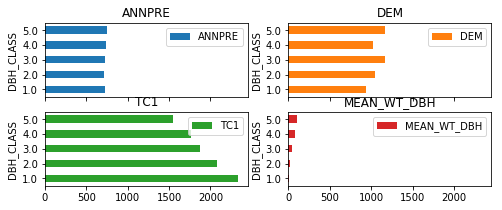

In [434]:
# Visualize distribution of spatial variables by DBH_CLASS

# First, group by DBH_CLASS and calculate the mean of each spatial variable
dbh_class_group_df = all_df.groupby('DBH_CLASS').mean()

# Subset the list of spatial variables down to just a few - use the
# printed list of columns to change the
print(list(dbh_class_group_df.columns))
dbh_class_group_df = dbh_class_group_df[['ANNPRE', 'DEM', 'TC1', 'MEAN_WT_DBH']]
dbh_class_group_df.plot(kind='barh', subplots=True, layout=(-1, 2), figsize=(8,3))

This next visualization uses the Seaborn graphics library to create scatterplots of `MEAN_WT_DBH` (Y) against all spatial variables (X) to look for possible relationships.  It incorporates a simple linear regression along with a confidence interval.  As you can see, not much of a relationship with any variable.  Double-click on the graphic to enlarge it.

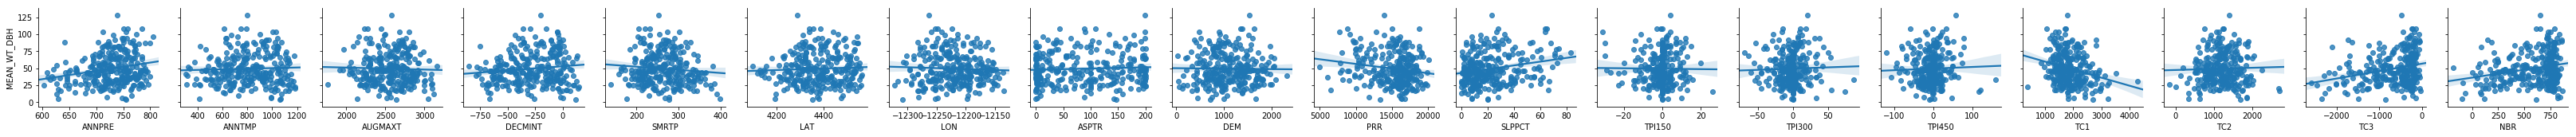

In [437]:
# Visualize MNDBHBA vs environmental variables

# Get list of all spatial variables excluding the PLTID column
env_vars = list(spatial_df.columns)
env_vars.remove('PLTID')

# Draw the pairplot of MEAN_WT_DBH against spatial variables
g = sns.pairplot(all_df,
    x_vars=env_vars,
    y_vars=['MEAN_WT_DBH'],
    kind='reg'
)

Here is one last version that uses `DBH_CLASS` as the hue within pair plots.  Here you can see relationships between the different spatial variables and how `DBH_CLASS` is distributed across the range of the variables (last row and column).  Play around with changing the variables, although probably don't do more than 4 or 5.

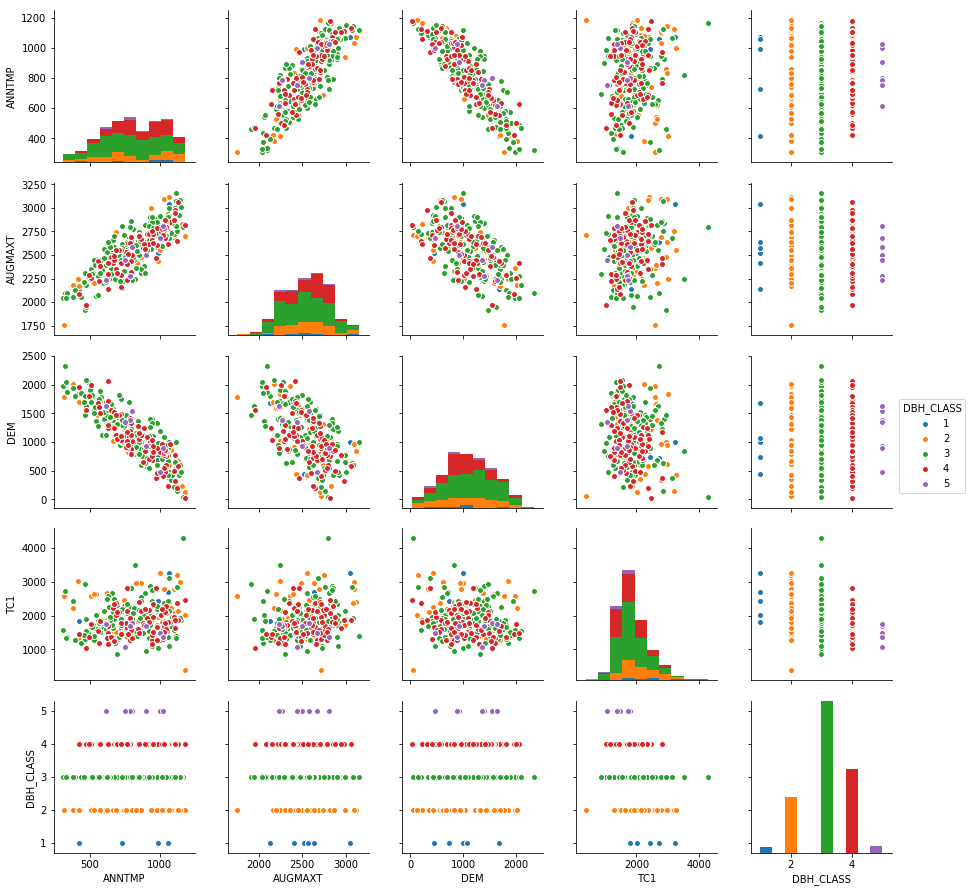

In [233]:
g = sns.pairplot(all_df[['ANNTMP', 'AUGMAXT', 'DEM', 'TC1', 'DBH_CLASS']],
    hue='DBH_CLASS')

As the very last step, we want to save the work we've done to summarize the tree data and link it to the spatial data.  The simplest way to do this is to write out the DataFrame as a CSV file (although it is possible to export to databases and Excel as well).  Find help on `all_df.to_csv` and write out the `all_df` DataFrame to a CSV file called `modeling.csv`.  Choose the keyword option to *not* write out the DataFrame's index. 

Well done!  When you've reached this point, type `import antigravity` into the following blank cell and evaluate it

In [236]:
# Export all modeling data as a CSV file
fn = 'modeling.csv'
all_df.to_csv(fn, index=False)